In [13]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import networkx as nx
import matplotlib.pyplot as plt

NumberOfNodes = 20
NumberOfEdges = 20
G = nx.gnm_random_graph(NumberOfNodes, NumberOfEdges)

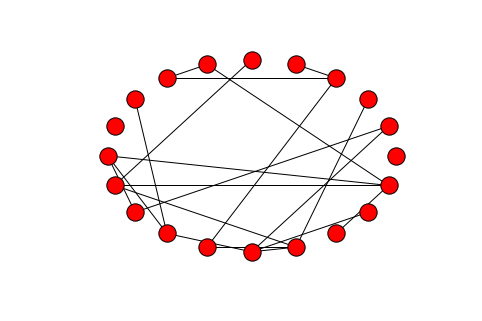

In [14]:
nx.draw_circular(G)
plt.show()
